# Week 03 - Dashboard Exercise 

Juana Wong

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv('../data/movie_ratings.csv')

In [3]:
# explore the dataset
df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998


In [4]:
df.describe()

,user_id,movie_id,rating,age,year,decade,rating_year
count,212595.000000,212595.000000,212595.000000,212595.000000,212559.000000,212559.000000,212595.000000
mean,464.525643,390.545173,3.551048,32.771382,1987.563105,1982.602148,1997.469282
std,267.294662,312.312060,1.119645,11.452661,13.990727,13.687463,0.499057
min,1.000000,1.000000,1.000000,7.000000,1922.000000,1920.000000,1997.000000
25%,255.000000,164.000000,3.000000,24.000000,1984.000000,1980.000000,1997.000000
50%,450.000000,293.000000,4.000000,30.000000,1994.000000,1990.000000,1997.000000
75%,688.000000,568.000000,4.000000,40.000000,1996.000000,1990.000000,1998.000000
max,943.000000,1682.000000,5.000000,73.000000,1998.000000,1990.000000,1998.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212595 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      212595 non-null  int64  
 1   movie_id     212595 non-null  int64  
 2   rating       212595 non-null  int64  
 3   timestamp    212595 non-null  object 
 4   age          212595 non-null  int64  
 5   gender       212595 non-null  object 
 6   occupation   212595 non-null  object 
 7   zip_code     212595 non-null  object 
 8   title        212595 non-null  object 
 9   year         212559 non-null  float64
 10  decade       212559 non-null  float64
 11  genres       212595 non-null  object 
 12  rating_year  212595 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 21.1+ MB


---

### 1. What's the breakdown of genres for the movies that were rated?

In [6]:
# find if any missing ratings
df['rating'].isna().value_counts()

rating
False    212595
Name: count, dtype: int64

There are no missing (null) ratings - all movies in the dataset were rated.

In [7]:
# breakdown of genres
df['genres'].value_counts()

genres
Drama          39895
Comedy         29832
Action         25589
Thriller       21872
Romance        19461
Adventure      13753
Sci-Fi         12730
War             9398
Crime           8055
Children        7182
Horror          5317
Mystery         5245
Musical         4954
Animation       3605
Western         1854
Film-Noir       1733
Fantasy         1352
Documentary      758
unknown           10
Name: count, dtype: int64

The genres with the largest number of ratings are 'Drama' (~40k), followed by 'Comedy' (~30k) and then 'Action' (~26k). 

The genre with the least number of ratings, excluding the 'unknown' or unspecified genre (~0k), is 'Documentary' (~0.7k), followed by 'Fantasy' (~1.3k) and 'Film-Noir' (~1.7k). 

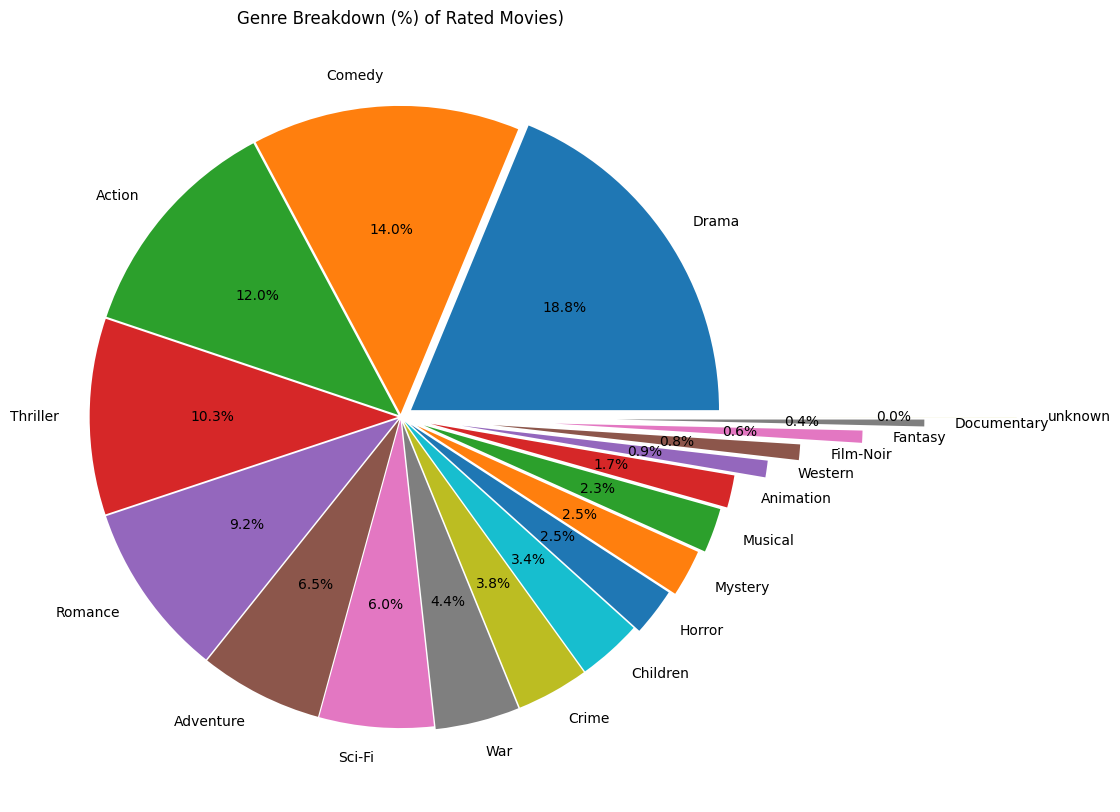

In [8]:
# basic visualization - pie chart
explode = (0.04, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.3, 0.5, 0.7, 1)

plt.figure(figsize=(10, 10))
df_genre_pie = df['genres'].value_counts(normalize=True)
df_genre_pie.plot(kind='pie', autopct='%1.1f%%', explode=explode, labeldistance=1.1)
plt.ylabel('')
plt.title('Genre Breakdown (%) of Rated Movies)')
plt.show()

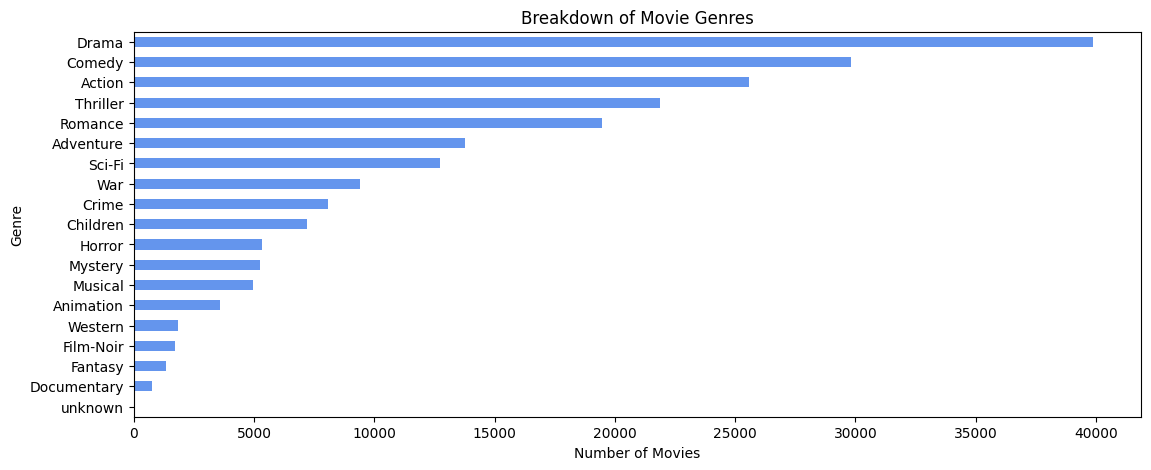

In [9]:
# basic visualization - breakdown of genres for movies that were rated
df_genre_count = df.groupby('genres')['movie_id'].count().sort_values()

plt.figure(figsize=(13,5))
df_genre_count.plot(kind='barh', color='cornflowerblue')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Breakdown of Movie Genres')
plt.show()

---

### 2. Which genres have the highest viewer satisfaction (highest ratings)?

In [10]:
# highest genre ratings - get avg ratings for each genre
df_highest_ratings = df.groupby('genres')['rating'].mean().sort_values(ascending=False)
df_highest_ratings

genres
Film-Noir      3.921523
War            3.815812
Drama          3.687379
Documentary    3.672823
Mystery        3.638132
Crime          3.632278
Romance        3.621705
Western        3.613269
Animation      3.576699
Sci-Fi         3.560723
Musical        3.521397
Thriller       3.509007
Adventure      3.503527
Action         3.480245
Comedy         3.394073
Children       3.353244
Horror         3.290389
Fantasy        3.215237
unknown        3.200000
Name: rating, dtype: float64

The ratings for all genres in this dataset range approx. between 3.2 and 3.9 (out of 5), with 'Film-Noir' (~3.9) having the highest rating, followed by 'War' (~3.8), then 'Drama' (~3.7). 

The lowest rated genres are the 'unknown' or unspecified genre (~3.20), followed by 'Fantasy' (~3.22) and then 'Horror' (~3.3).

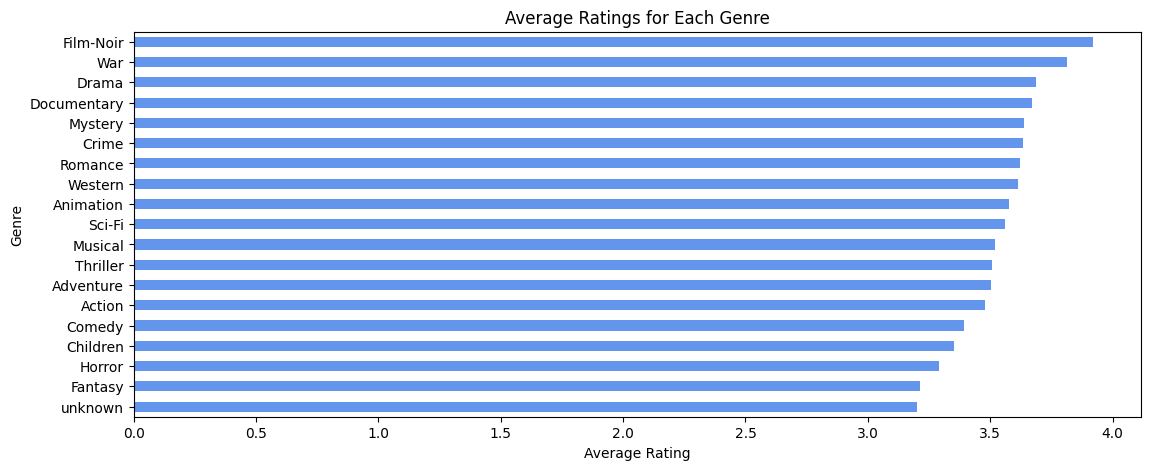

In [11]:
# basic visualization - avg ratings for all genres

plt.figure(figsize=(13,5))
df_highest_ratings.sort_values(ascending=True).plot(kind='barh', color='cornflowerblue')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Ratings for Each Genre')
plt.show()

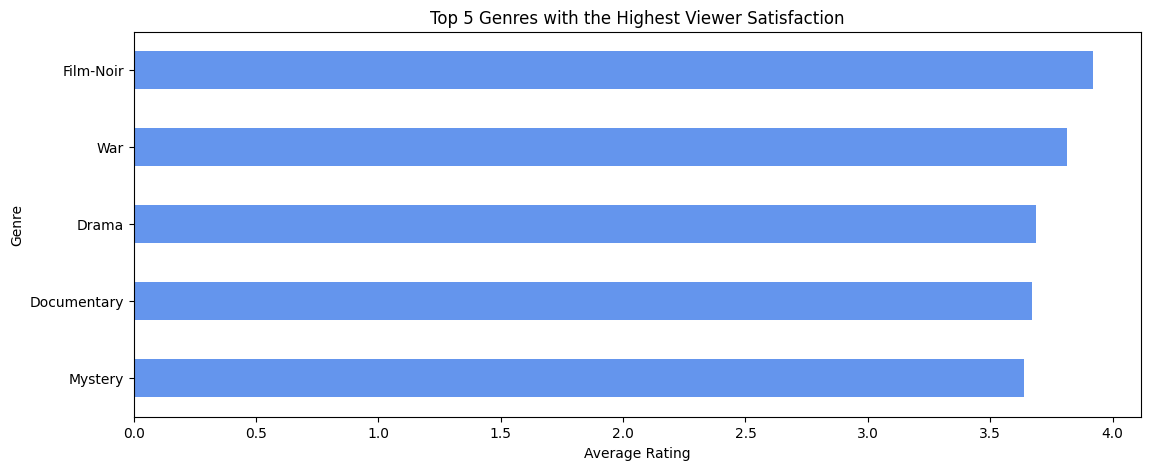

In [12]:
# basic visualization - highest viewer satisfaction (top 5 genres with highest rating)

plt.figure(figsize=(13,5))
df_highest_ratings.nlargest(5).sort_values(ascending=True).plot(kind='barh', color='cornflowerblue')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Top 5 Genres with the Highest Viewer Satisfaction')
plt.show()

---

### 3. How does mean rating change across movie release years?

In [13]:
# df.head()

In [14]:
# for each year - find avg ratings
df_ratings_by_year = df.groupby('year')['rating'].mean()
df_ratings_by_year

year
1922.0    3.555556
1926.0    3.000000
1930.0    3.777778
1931.0    4.000000
1932.0    3.833333
            ...   
1994.0    3.426577
1995.0    3.443458
1996.0    3.312172
1997.0    3.325326
1998.0    3.323529
Name: rating, Length: 71, dtype: float64

There are gap years within the (1922-1998) timeframe where no movie data was provided.

In [15]:
df_ratings_by_year.sort_values(ascending=False)

year
1942.0    4.398467
1972.0    4.258887
1977.0    4.222897
1949.0    4.186047
1962.0    4.130000
            ...   
1978.0    3.371367
1997.0    3.325326
1998.0    3.323529
1996.0    3.312172
1926.0    3.000000
Name: rating, Length: 71, dtype: float64

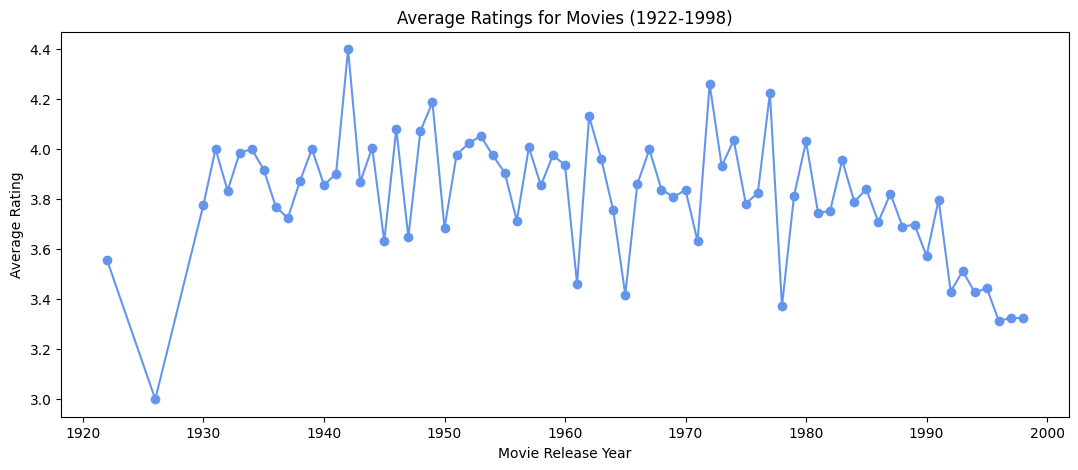

In [16]:
# basic visualization - avg rating for movies released each year

plt.figure(figsize=(13,5))
df_ratings_by_year.plot(kind='line', marker='o', color='cornflowerblue')
plt.ylabel('Average Rating')
# plt.ylim(0, 5)
plt.xlabel('Movie Release Year')
plt.title('Average Ratings for Movies (1922-1998)')
plt.show()

1942 peaked with the highest average rating (~4.4) for movies across all genres in this dataset, followed by the years 1972 (~4.3) and 1977 (~4.2). 

The years with the lowest average movie rating for all genres are 1926 (~3.00), followed by 1996 (~3.31), and then 1998 (~3.32).

In [17]:
# fluctuations in ratings/year may be due to - number of films released? num ratings per movie?
df_ratings_by_year_count = df.groupby('year')[['rating', 'movie_id', 'user_id']].count()
# df_ratings_by_year_count.head()

df_ratings_by_year_count['rating'].sort_values(ascending=False)

year
1996.0    37505
1997.0    33760
1995.0    25229
1994.0    18046
1993.0    12778
          ...  
1943.0       45
1936.0       39
1932.0       24
1930.0       18
1926.0        2
Name: rating, Length: 71, dtype: int64

Looking deeper, the years with the lowest ratings also recorded the lowest number of ratings. 

This perhaps can account for the ratings trough in 1926 (2 ratings) due to the small sample size. 

By contrast, 1996, which has the second lowest rating, is in fact the year with the highest number of ratings recorded. 

In [18]:
# for 1996 films, groupby movie title & get num ratings, avg ratings
df_1996 = df[ df['year'] == 1996]
df_1996_lowR = df_1996.groupby('title').agg(num_rating=('rating', 'count'), avg_rating=('rating', 'mean'))
df_1996_lowR

,num_rating,avg_rating
title,,
101 Dalmatians (1996),218,2.908257
2 Days in the Valley (1996),93,3.225806
A Chef in Love (1996),8,4.125000
"Adventures of Pinocchio, The (1996)",78,3.051282
Aladdin and the King of Thieves (1996),78,2.846154
...,...,...
When We Were Kings (1996),44,4.045455
When the Cats Away (Chacun cherche son chat) (1996),32,3.562500
White Squall (1996),170,3.400000


In [19]:
# filter for ratings below the 1996 average
df_1996_lowR = df_1996_lowR[ df_1996_lowR['avg_rating'] <= 3.00 ]
df_1996_lowR

,num_rating,avg_rating
title,,
101 Dalmatians (1996),218,2.908257
Aladdin and the King of Thieves (1996),78,2.846154
Alaska (1996),26,2.692308
Albino Alligator (1996),12,2.500000
All Dogs Go to Heaven 2 (1996),45,1.866667
...,...,...
Unhook the Stars (1996),10,2.500000
"Van, The (1996)",12,2.666667
"Very Brady Sequel, A (1996)",93,2.397849


The top movies that contributed to 1996's low average movie rating (~3.00) across all genres in this dataset are: '101 Dalmatians' (~2.9, with 218 ratings), followed by 'Aladdin and the King of Thieves' (~2.8, with 78 ratings). 

Of 295 movies released in 1996, 122 movies (~41.4%) received a rating no greater than 3.0.

In [20]:
# group movies ratings by the decade
df_ratings_by_decade = df.groupby('decade')['rating'].mean()
df_ratings_by_decade

decade
1920.0    3.535714
1930.0    3.929001
1940.0    4.005913
1950.0    3.934209
1960.0    3.878207
1970.0    3.931579
1980.0    3.798561
1990.0    3.396566
Name: rating, dtype: float64

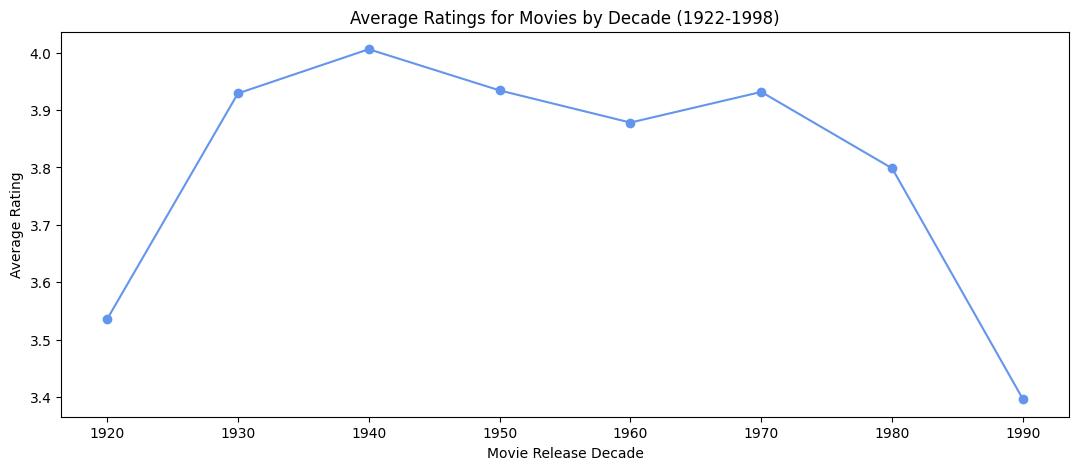

In [21]:
# basic visualization - avg rating for movies released each decade

plt.figure(figsize=(13,5))
df_ratings_by_decade.plot(kind='line', marker='o', color='cornflowerblue')
plt.ylabel('Average Rating')
# plt.ylim(0, 5)
plt.xlabel('Movie Release Decade')
plt.title('Average Ratings for Movies by Decade (1922-1998)')
plt.show()

Viewing movie ratings by the decade of their release, the decades with the highest satisfaction (measured by average ratings) from its released movies are the 1940s. 

The decades with the lowest viewer satisfaction are the 1990s, followed by the 1920s. 

---

### 4. What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?

In [22]:
df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998


In [23]:
# counts, ratings per movie
movie_counts = df.groupby('title')['rating'].count()
movie_ratings = df.groupby('title')['rating'].mean()

In [24]:
# get movies with counts >= 50
df_best_movies_50 = movie_ratings[movie_counts >= 50].sort_values(ascending=False)
# show
df_best_movies_50

title
Close Shave, A (1995)                                     4.491071
Schindler's List (1993)                                   4.466443
Wrong Trousers, The (1993)                                4.466102
Casablanca (1942)                                         4.456790
Wallace & Gromit: The Best of Aardman Animation (1996)    4.447761
                                                            ...   
Grease 2 (1982)                                           2.000000
Mortal Kombat: Annihilation (1997)                        1.953488
Crow: City of Angels, The (1996)                          1.948718
Barb Wire (1996)                                          1.933333
Free Willy 3: The Rescue (1997)                           1.740741
Name: rating, Length: 768, dtype: float64

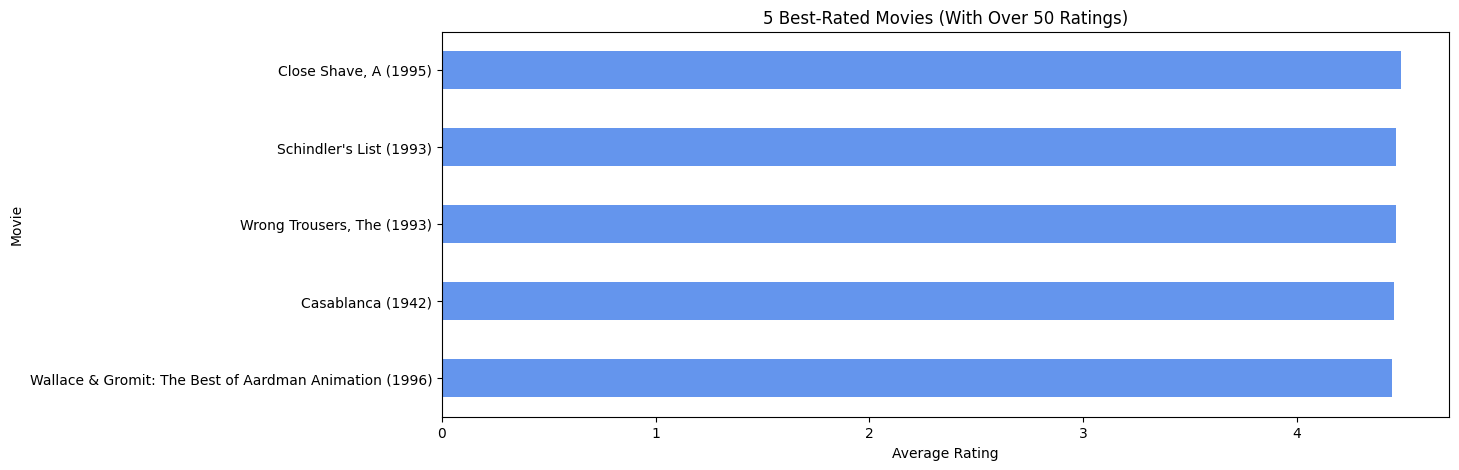

In [25]:
# basic visualization - top 5 movies (avg rating) with at least 50 ratings
plt.figure(figsize=(13,5))
df_best_movies_50.nlargest(5).sort_values(ascending=True).plot(kind='barh', color='cornflowerblue')
plt.ylabel('Movie')
plt.xlabel('Average Rating')
plt.title('5 Best-Rated Movies (With Over 50 Ratings)')
plt.show()

The movies with the highest average ratings (given that there were 50 or more ratings provided) in this dataset are: 
1. A Close Shave (~4.49)
2. Schindler's List (~4.47)
3. The Wrong Trousers (~4.47)
4. Casablanca (~4.46)
5. *Wallace & Gromit: The Best of Aardman Animation (~4.4)*

In [26]:
# get movies with counts >= 150
df_best_movies_150 = movie_ratings[movie_counts >= 150].sort_values(ascending=False)
# show
df_best_movies_150

title
Close Shave, A (1995)                     4.491071
Schindler's List (1993)                   4.466443
Wrong Trousers, The (1993)                4.466102
Casablanca (1942)                         4.456790
Shawshank Redemption, The (1994)          4.445230
                                            ...   
Batman & Robin (1997)                     2.451613
Lawnmower Man, The (1992)                 2.446154
Jungle2Jungle (1997)                      2.439394
Star Trek V: The Final Frontier (1989)    2.396825
Beautician and the Beast, The (1997)      2.313953
Name: rating, Length: 400, dtype: float64

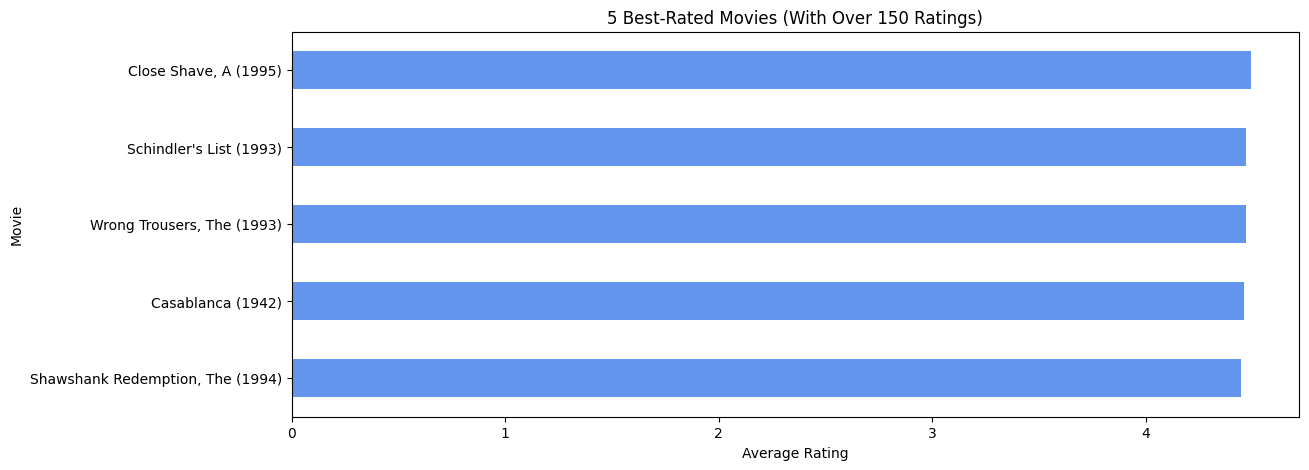

In [27]:
# basic visualization - top 5 movies (avg rating) with at least 50 ratings
plt.figure(figsize=(13,5))
df_best_movies_150.nlargest(5).sort_values(ascending=True).plot(kind='barh', color='cornflowerblue')
plt.ylabel('Movie')
plt.xlabel('Average Rating')
plt.title('5 Best-Rated Movies (With Over 150 Ratings)')
plt.show()

When adjusted for movies with the highest average ratings, given that there were 150 or more ratings provided in this dataset, the fifth highest rated movie changed from : 

'Wallace & Gromit: The Best of Aardman Animation' to 'The Shawshank Redemption'
1. A Close Shave (~4.49)
2. Schindler's List (~4.47)
3. The Wrong Trousers (~4.47)
4. Casablanca (~4.46)
5. *The Shawshank Redemption (~4.5)*

---

### 5. [EXTRA CREDIT] Pick 4 genres. For each genre, how does the rating change as viewer age increases?

- Suggestion: try to do this for more than 4 genres and see which have the most interesting visualization.

In [28]:
# Pick 8 genres :
## - Action, Western, Musical, Children, Comedy, Sci-Fi, Animation, Horror

df_8_genres = df[df['genres'].isin(['Action', 'Western', 'Musical', 'Children', 'Comedy', 'Sci-Fi', 'Animation', 'Horror',])]
df_8_genres.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
5,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),1994.0,1990.0,Children,1997
6,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),1994.0,1990.0,Comedy,1997
10,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),1994.0,1990.0,Western,1997
13,298,474,4,1998-01-07 14:20:06,44,M,executive,01581,Dr. Strangelove or: How I Learned to Stop Worr...,1963.0,1960.0,Sci-Fi,1998


In [29]:
df_8_genres = df_8_genres[['genres', 'age', 'rating']]
df_8_genres.head()

,genres,age,rating
0,Comedy,49,3
5,Children,25,1
6,Comedy,25,1
10,Western,28,2
13,Sci-Fi,44,4


In [30]:
# # groupby genre & age - find average rating
# df_8_AR = df_8_genres.groupby(['genres', 'age'])['rating'].mean()
# df_8_AR

In [31]:
# for each genre, groupby age - find avg rating
## - Action, Western, Musical, Children, Comedy, Sci-Fi, Animation, Horror

df_action = df_8_genres[ df_8_genres['genres'] == 'Action' ]
df_action_AR = df_action.groupby('age')['rating'].mean()

df_western = df_8_genres[ df_8_genres['genres'] == 'Western' ]
df_western_AR = df_western.groupby('age')['rating'].mean()

df_musical = df_8_genres[ df_8_genres['genres'] == 'Musical' ]
df_musical_AR = df_musical.groupby('age')['rating'].mean()

df_child = df_8_genres[ df_8_genres['genres'] == 'Children' ]
df_child_AR = df_child.groupby('age')['rating'].mean()

df_comedy = df_8_genres[ df_8_genres['genres'] == 'Comedy' ]
df_comedy_AR = df_comedy.groupby('age')['rating'].mean()

df_scifi = df_8_genres[ df_8_genres['genres'] == 'Sci-Fi' ]
df_scifi_AR = df_scifi.groupby('age')['rating'].mean()

df_anime = df_8_genres[ df_8_genres['genres'] == 'Animation' ]
df_anime_AR = df_anime.groupby('age')['rating'].mean()

df_horror = df_8_genres[ df_8_genres['genres'] == 'Horror' ]
df_horror_AR = df_horror.groupby('age')['rating'].mean()

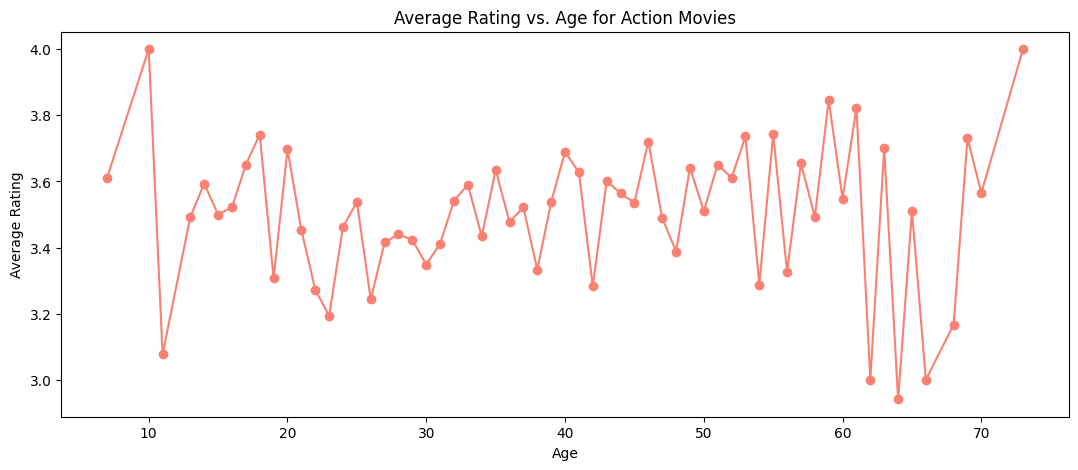

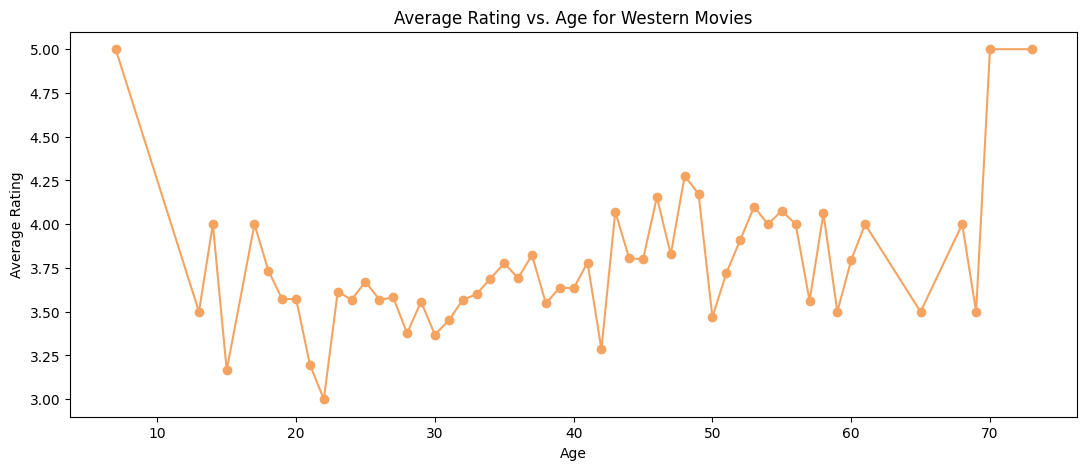

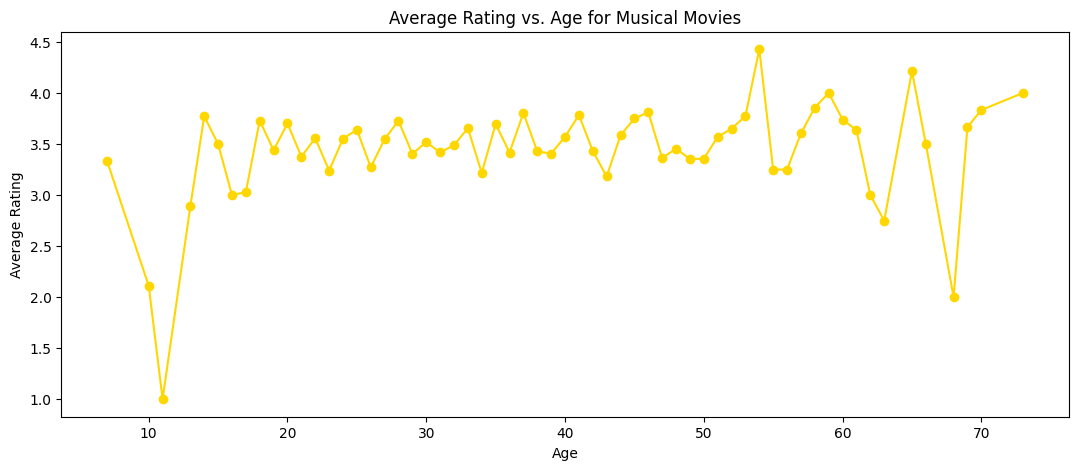

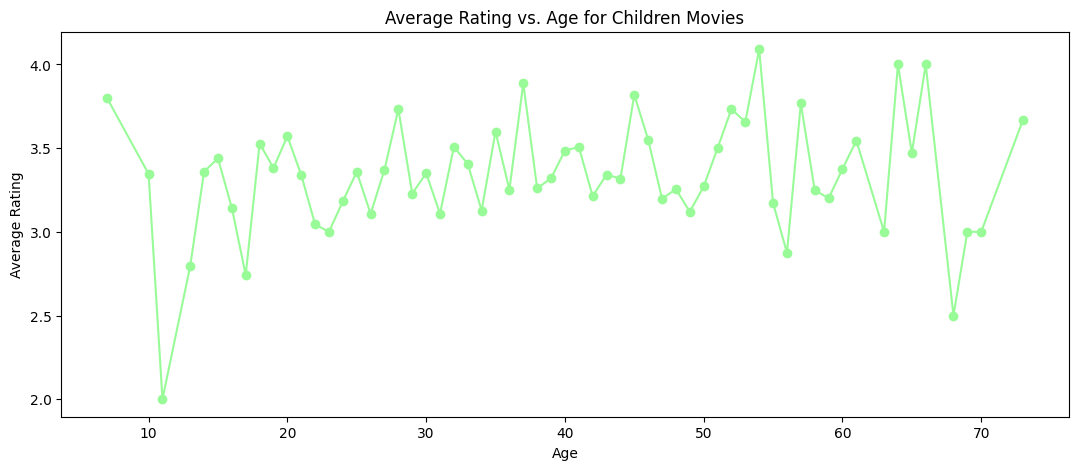

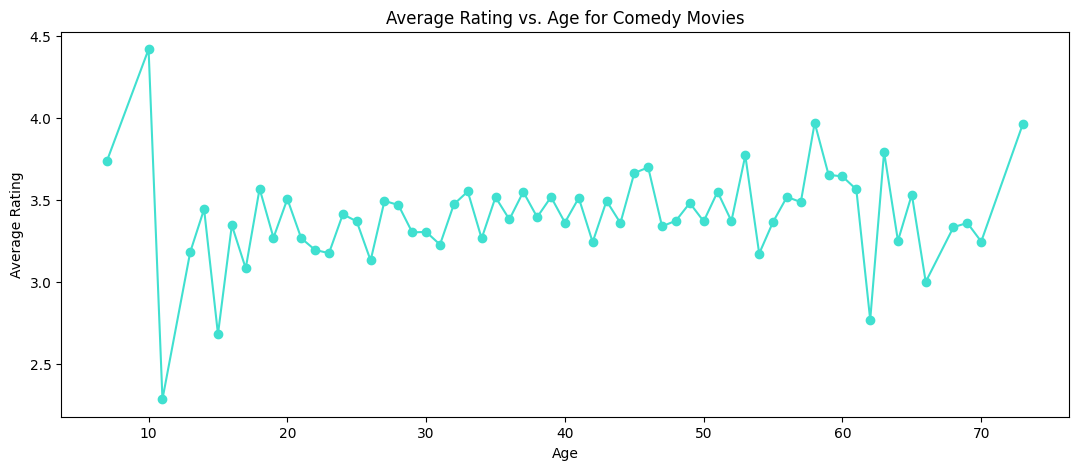

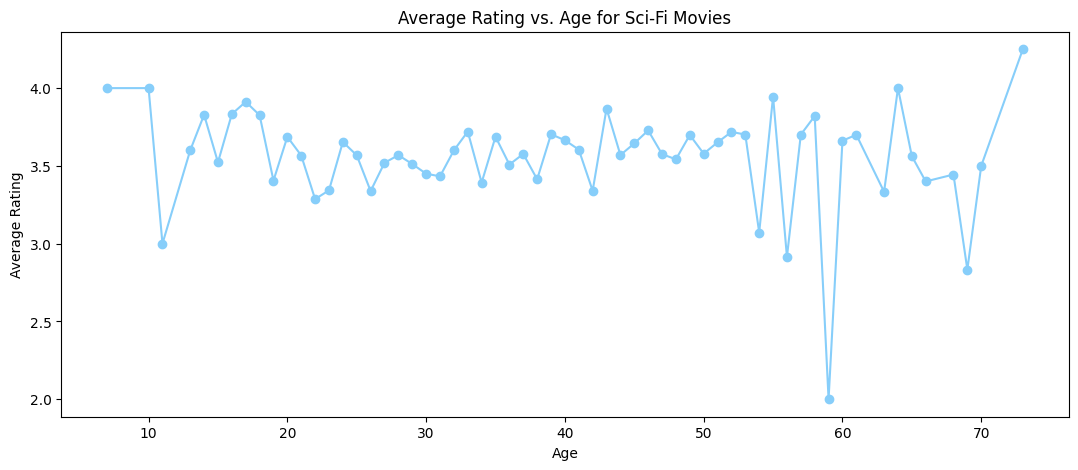

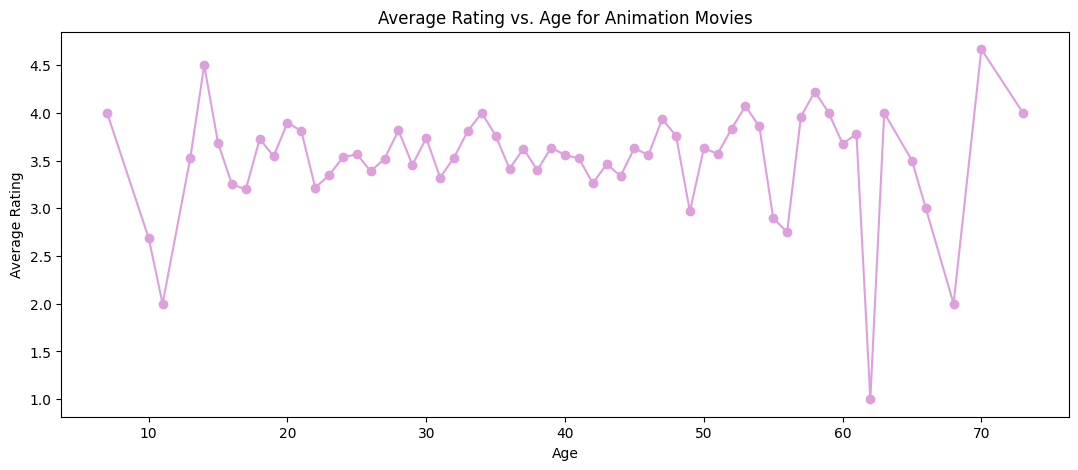

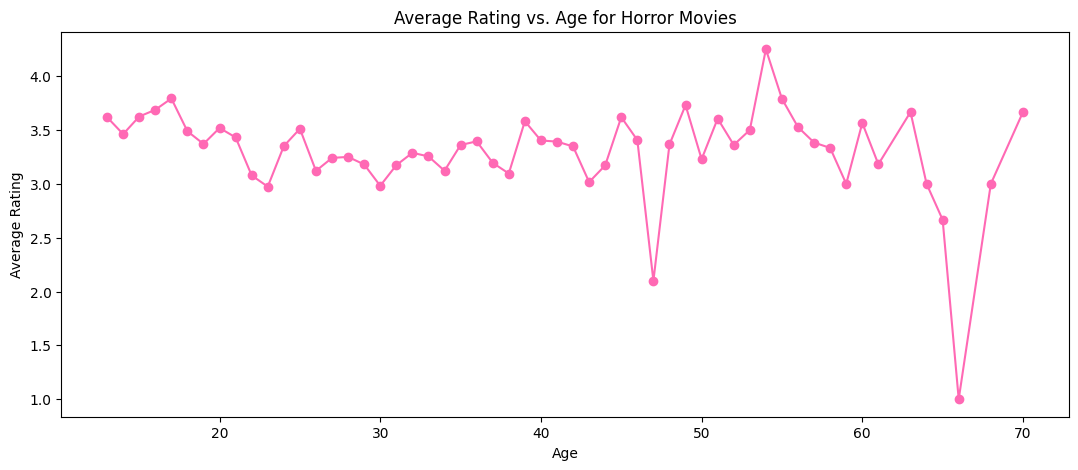

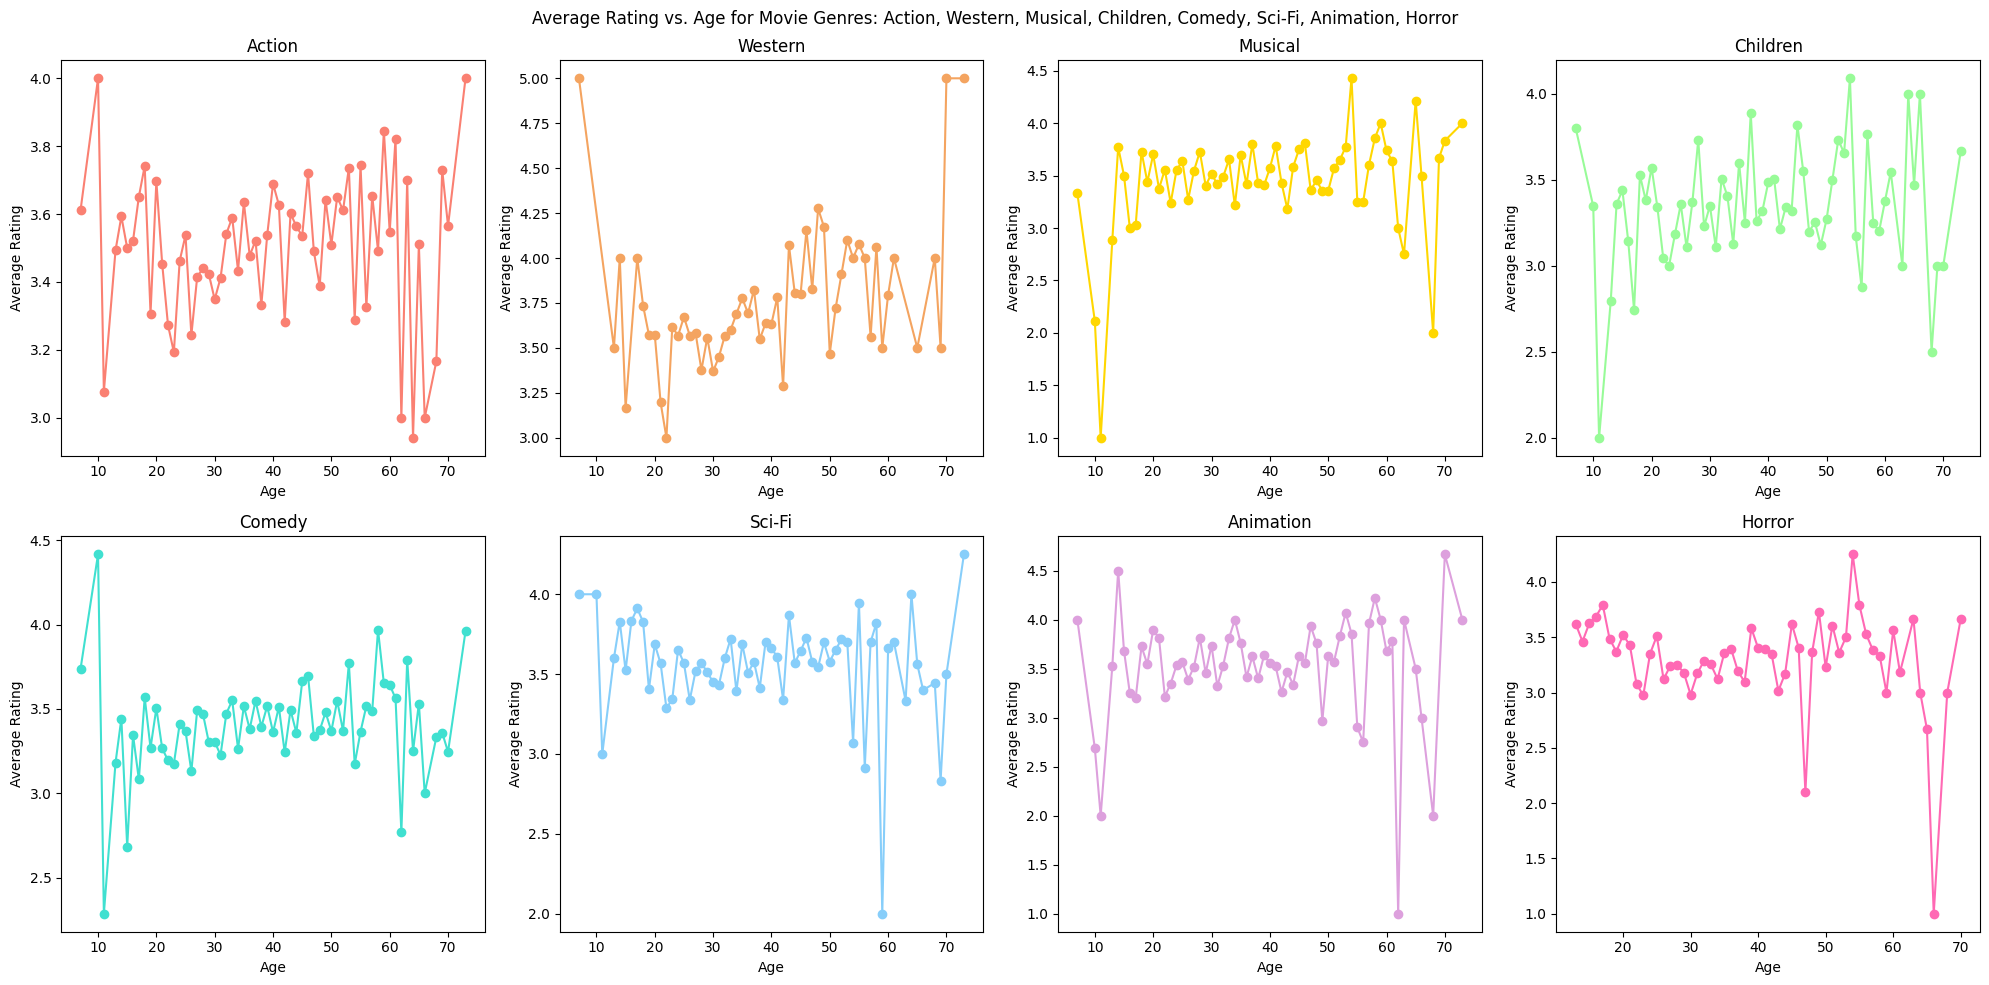

In [32]:
# basic visualization - avg ratings through the ages (action)
plt.figure(figsize=(13,5))
df_action_AR.plot(kind='line', marker='o', color='salmon')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Age for Action Movies')
plt.show()

# basic visualization - avg ratings through the ages (western)
plt.figure(figsize=(13,5))
df_western_AR.plot(kind='line', marker='o', color='sandybrown')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Age for Western Movies')
plt.show()

# basic visualization - avg ratings through the ages (musical)
plt.figure(figsize=(13,5))
df_musical_AR.plot(kind='line', marker='o', color='gold')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Age for Musical Movies')
plt.show()

# basic visualization - avg ratings through the ages (children)
plt.figure(figsize=(13,5))
df_child_AR.plot(kind='line', marker='o', color='palegreen')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Age for Children Movies')
plt.show()

# basic visualization - avg ratings through the ages (comedy)
plt.figure(figsize=(13,5))
df_comedy_AR.plot(kind='line', marker='o', color='turquoise')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Age for Comedy Movies')
plt.show()

# basic visualization - avg ratings through the ages (sci-fi)
plt.figure(figsize=(13,5))
df_scifi_AR.plot(kind='line', marker='o', color='lightskyblue')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Age for Sci-Fi Movies')
plt.show()

# basic visualization - avg ratings through the ages (animation)
plt.figure(figsize=(13,5))
df_anime_AR.plot(kind='line', marker='o', color='plum')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Age for Animation Movies')
plt.show()

# basic visualization - avg ratings through the ages (horror)
plt.figure(figsize=(13,5))
df_horror_AR.plot(kind='line', marker='o', color='hotpink')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Age for Horror Movies')
plt.show()


# plot all 8 graphs in 1 figure
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

df_AR = [df_action_AR, df_western_AR, df_musical_AR, df_child_AR, df_comedy_AR, df_scifi_AR, df_anime_AR, df_horror_AR]
colors = ['salmon', 'sandybrown', 'gold', 'palegreen', 'turquoise', 'lightskyblue', 'plum', 'hotpink']
titles = ['Action', 'Western', 'Musical', 'Children', 'Comedy', 'Sci-Fi', 'Animation', 'Horror']

for i, ax in enumerate(axes):
    df_AR[i].plot(kind='line', marker='o', ax=ax, color=colors[i])
    ax.set_xlabel('Age')
    ax.set_ylabel('Average Rating')
    ax.set_title(f'{titles[i]}')

fig.suptitle('Average Rating vs. Age for Movie Genres: Action, Western, Musical, Children, Comedy, Sci-Fi, Animation, Horror')
plt.tight_layout()
plt.show()

In [33]:
# df_8_genres.age.sort_values(ascending=False)

The age range of users who participated in this dataset falls between [7, 73] years of age.

Eight genres from this dataset were selected for a further analysis: *Action*, *Western*, *Musical*, *Children*, *Comedy*, *Sci-Fi*, *Animation*, and *Horror*.

Across most of these genres, namely *Action*, *Western*, *Musical*, *Children*, *Comedy*, *Sci-Fi*, and *Animation*, movie ratings from those 10 years old or younger responded negatively, relative to other age groups within the same movie genre. 

Interestingly, users close to 10 years old on average appear to dislike the *Children*, *Comedy*, *Action*, and *Animation* movie genres. 

By contrast, those 70+ years tend to respond more positively to these genres, rating them higher than most--if not all--other age groups within the same movie genre. 

Interestingly, users between the 60-70 year old age range tend to react and rate movies more negatively compared to other age groups within the same genre. This behavior can be seen in the *Horror*, *Action* and *Animation* genres.

The genres with less average-rating fluctuations, which may indicate its universal likeability or overall viewer satisfaction, across all age groups, appear to be *Horror*, *Comedy* and *Musical*, among the 8 selected genres. 

---

### 6. [EXTRA CREDIT] Plot number of ratings vs mean rating per genre. Is there a correlation between the volume of ratings and mean rating?

In [34]:
# df.head()

In [35]:
# group by genre, get ratings count & avg
genre_stats = df.groupby('genres').agg(num_rating=('rating', 'count'), avg_rating=('rating', 'mean'))
genre_stats

,num_rating,avg_rating
genres,,
Action,25589,3.480245
Adventure,13753,3.503527
Animation,3605,3.576699
Children,7182,3.353244
Comedy,29832,3.394073
Crime,8055,3.632278
Documentary,758,3.672823
Drama,39895,3.687379
Fantasy,1352,3.215237


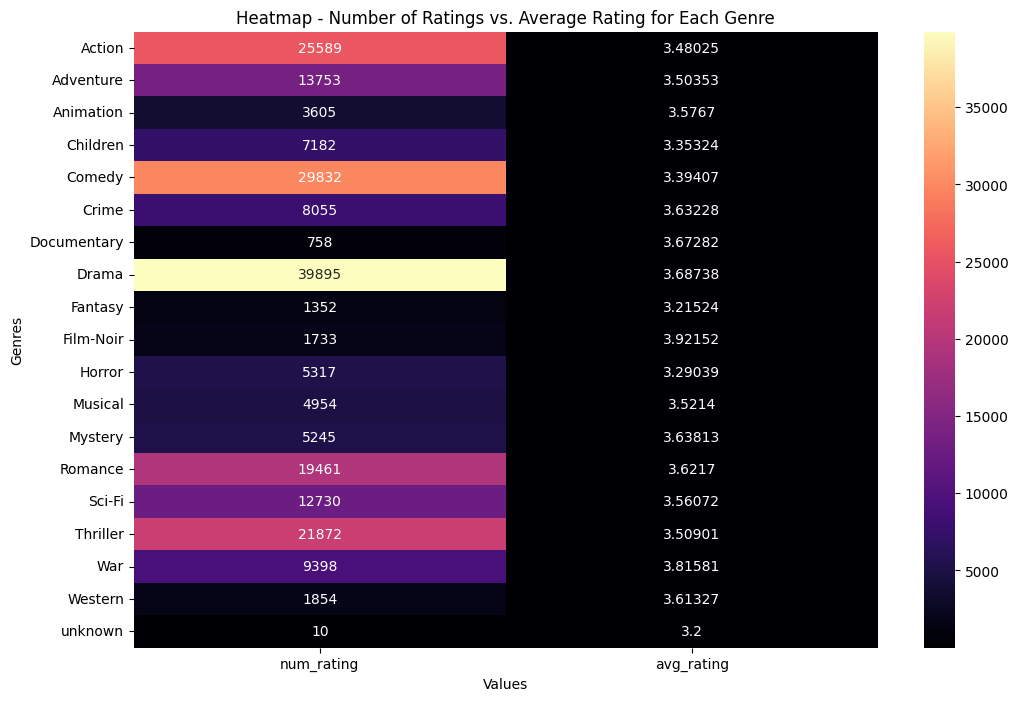

In [36]:
# seaborn visualization - heatmap using genre (index)
plt.figure(figsize=(12, 8))
sns.heatmap(genre_stats, annot=True, fmt="g", cmap='magma')
plt.title('Heatmap - Number of Ratings vs. Average Rating for Each Genre')
plt.xlabel('Values')
plt.ylabel('Genres')
plt.show()

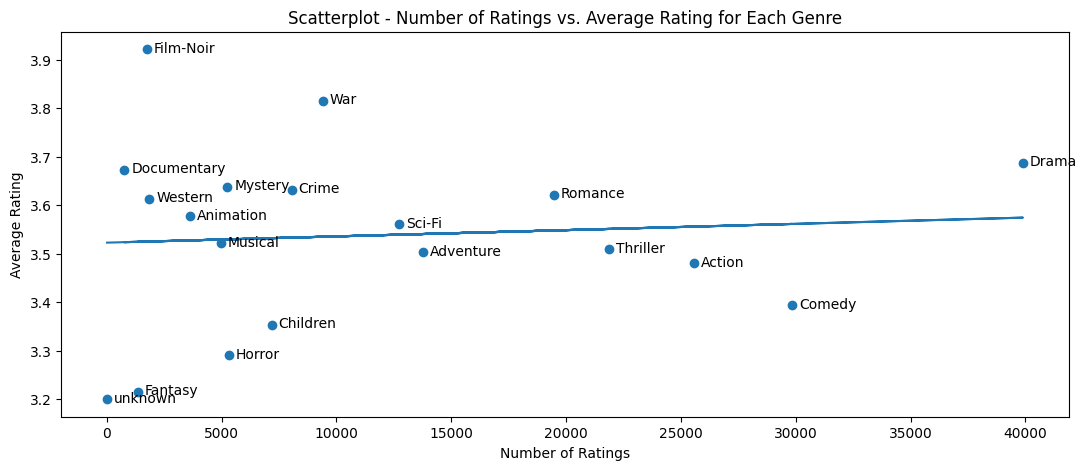

In [37]:
# visualization - correlation scatterplot

# reset index - get genre col
genre_stats = genre_stats.reset_index()

# finding best slope-intercept line (y = mx + b), get m & b
m, b = np.polyfit(genre_stats['num_rating'], genre_stats['avg_rating'], 1)

# plot
plt.figure(figsize=(13,5))
plt.scatter(genre_stats['num_rating'], genre_stats['avg_rating'])
plt.plot(genre_stats['num_rating'], m*genre_stats['num_rating'] + b)

# label each point with genre
for i, row in genre_stats.iterrows():
    plt.text(row['num_rating'] + 300, row['avg_rating'] - 0.006, row['genres'], ha='left')

plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.title('Scatterplot - Number of Ratings vs. Average Rating for Each Genre')
plt.show()

In [38]:
# calculate correlation coeff
correlation = np.corrcoef(genre_stats['num_rating'], genre_stats['avg_rating'])[0, 1]
print(f"Theres is a weak or negligible correlation between the number of ratings and \nthe average rating (for all movies, across all genres):", correlation)

Theres is a weak or negligible correlation between the number of ratings and 
the average rating (for all movies, across all genres): 0.07708120449703999


Given the correlation coefficient of approx. `7.7%`, there is a very weak or negligible relationship between the number of ratings and the average rating (for all movies, across all genres). 

A few data points that may exemplify this are 'Film-Noir' and 'Drama'. 

'Film-Noir' has a very low count of ratings recorded in the dataset (4th among the least represented genres in the dataset), but its overall average rating is the highest among all genres. 

'Drama', on the other hand, has the highest representation in number of ratings received, but whose overall average rating falls closer to the average rating of all movies and genres.

### 7. [EXTRA CREDIT] We gave you a pre-cleaned `genres` column, the original dataset is `movie_ratings_EC.csv`, can you clean it yourself?

- Hint: Use `.explode()`

In [39]:
# cleaned dataset
df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998


In [40]:
df.shape

(212595, 13)

In [41]:
# load EC dataset
df_EC = pd.read_csv('../data/movie_ratings_EC.csv')
df_EC.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime|Film-Noir|Mystery|Thriller,1998
2,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),1994.0,1990.0,Children|Comedy,1997
3,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),1994.0,1990.0,Drama|Romance|War|Western,1997
4,166,346,1,1998-02-02 05:33:16,47,M,educator,55113,Jackie Brown (1997),1997.0,1990.0,Crime|Drama,1998


In [42]:
df_EC.shape

(100000, 13)

In [43]:
# to use `.explode()`, need to convert genres col => list
df_EC['genres'] = df_EC['genres'].str.split('|')
# df_EC.head()

df_EC = df_EC.explode('genres')
df_EC.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998


In [44]:
df_EC.shape

(212595, 13)